In [1]:
words = open('names.txt', 'r').read().splitlines()

In [2]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [3]:
b = {}
for w in words:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        biagram = (ch1, ch2)
        b[biagram] = b.get(biagram, 0) + 1


In [4]:
sorted(b.items(), key = lambda kv: -kv[1])

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [5]:
import torch

In [6]:
N = torch.zeros((27, 27), dtype=torch.int32)

In [7]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s, i in stoi.items()}

In [8]:

for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1

In [9]:

itos

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '.'}

(-0.5, 26.5, 26.5, -0.5)

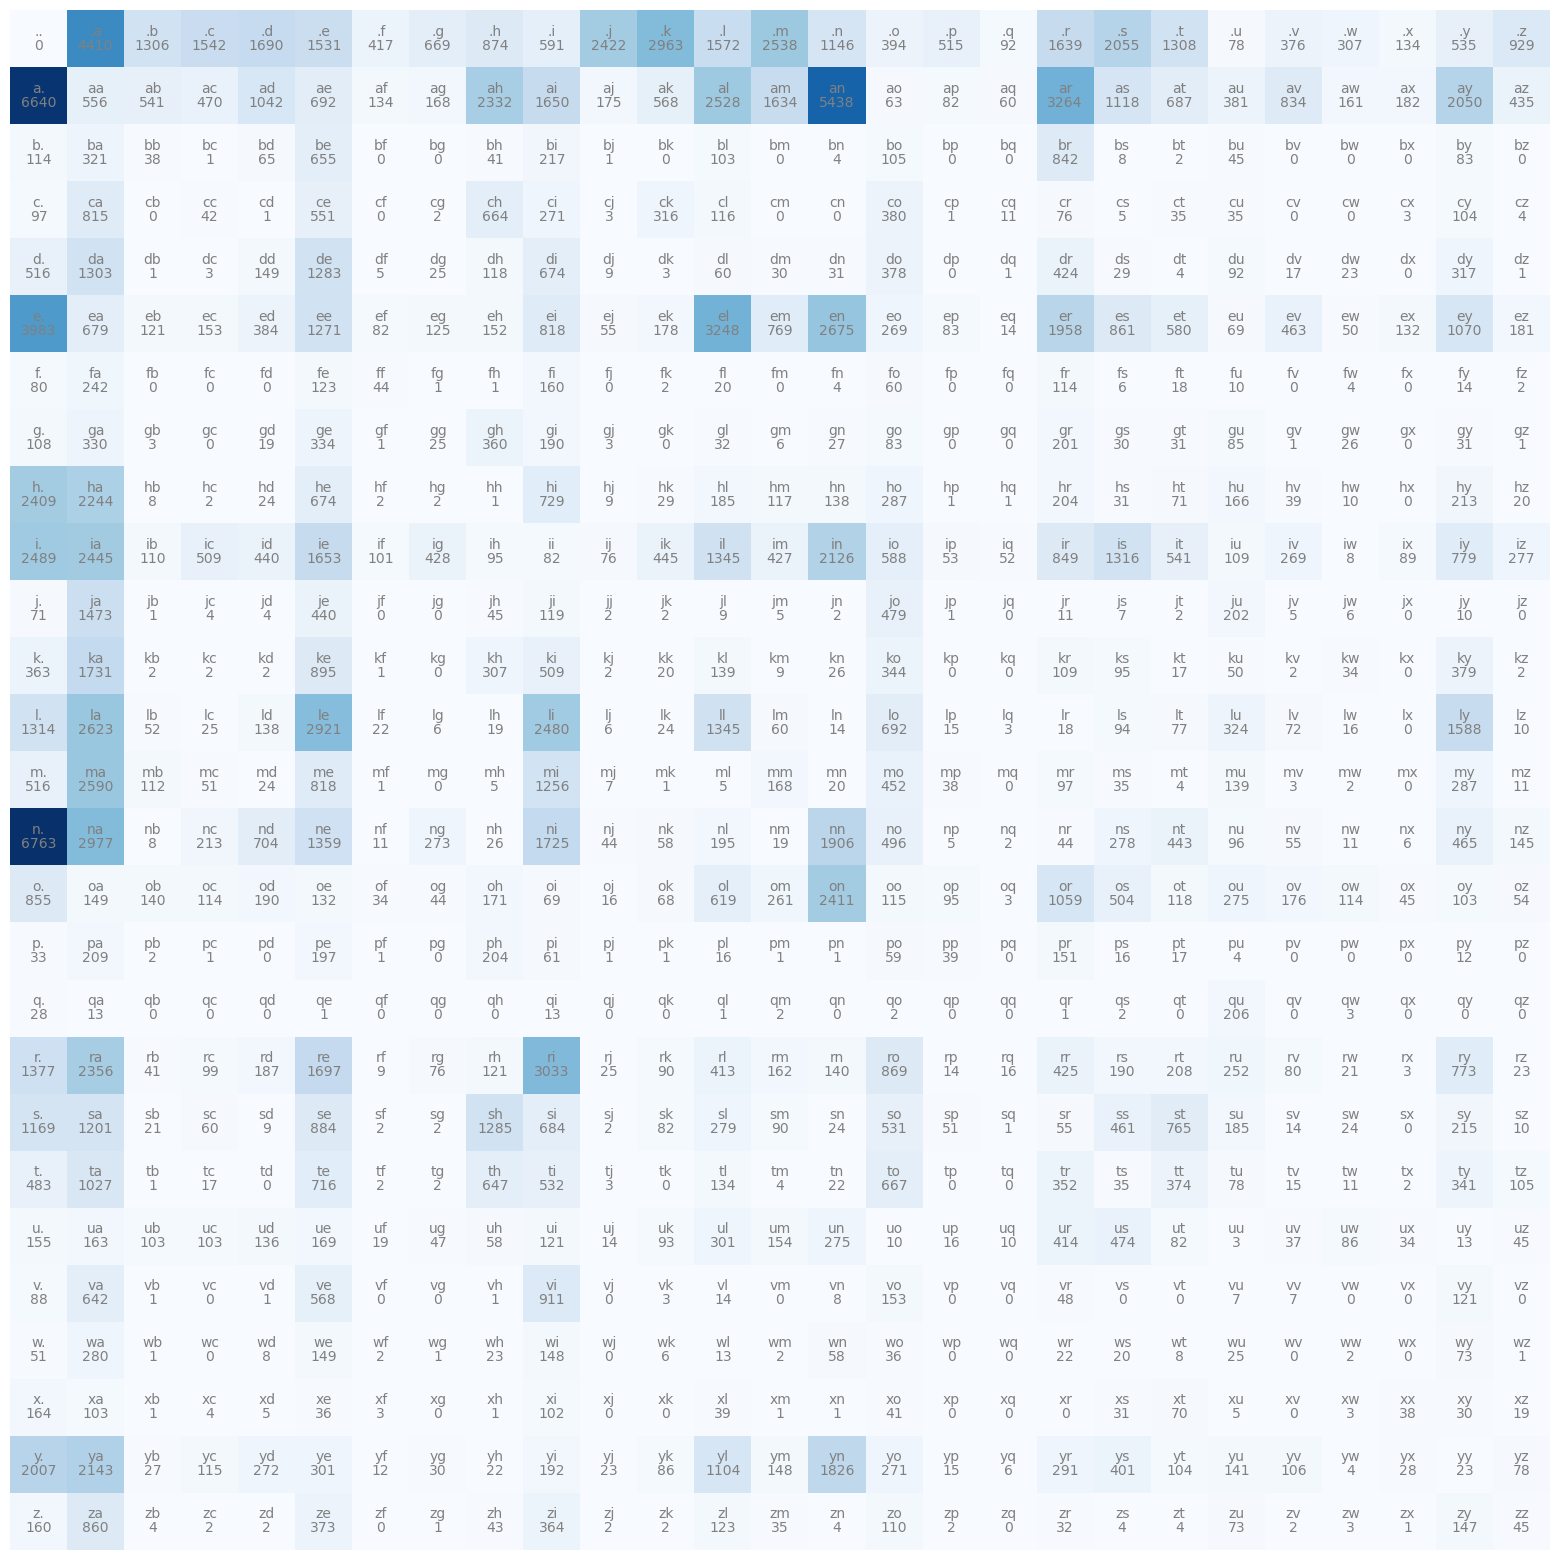

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20,20))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha='center', va='bottom', color='gray')
        plt.text(j, i, N[i, j].item(), ha='center', va='top', color='gray')
plt.axis('off')

In [11]:
N[0, :]

tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32)

In [12]:
p = N[0].float()
p = p/p.sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [13]:
g = torch.Generator().manual_seed(2147483647)
ix = torch.multinomial(p, num_samples=1, replacement=True, generator =g).item()
itos[ix]

'm'

In [14]:
g = torch.Generator().manual_seed(2147483647)
p = torch.rand(3, generator=g)
p

tensor([0.7081, 0.3542, 0.1054])

In [15]:
torch.multinomial(p, num_samples=20, replacement=True, generator=g)

tensor([1, 1, 2, 0, 0, 2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1])

In [22]:
P = (N+1).float()
P /= P.sum(1, keepdim=True)

In [17]:
P[0].sum()

tensor(1.)

In [18]:
g = torch.Generator().manual_seed(2147483647)
for i in range(40):
    out =[]
    ix = 0
    while True:
        p = P[ix]
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator =g).item()
        out.append(itos[ix])
        if ix==0:
            break
    print(''.join(out))

mor.
axx.
minaymoryles.
kondlaisah.
anchshizarie.
odaren.
iaddash.
h.
jhinatien.
egushl.
h.
br.
a.
jayn.
ilemannariaenien.
be.
f.
akiinela.
trttanakeroruceyaaxatona.
lamoynayrkiedengin.
torrederahnn.
ellovyllobrqura.
ay.
h.
kn.
jaieendenelele.
kianu.
eryly.
zeeieil.
kayvirgjusinn.
r.
t.
rja.
kronanurolin.
din.
elfr.
dikie.
s.
elarieiavelvalllaish.
eythann.


In [23]:
log_likelihood = 0.0
n=0
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n += 1
print(f'{log_likelihood=}')
nll = -log_likelihood
print(f'{nll=}')
print(f'{nll/n}')

log_likelihood=tensor(-559951.5625)
nll=tensor(559951.5625)
2.4543561935424805


In [24]:
#Create the training set
xs, ys = [], []
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num =xs.nelement()

In [25]:
import torch.nn.functional as F
xenc = F.one_hot(xs,num_classes=27).float()
xenc.shape

torch.Size([228146, 27])

In [26]:
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)


In [28]:
#Forward pass
for k in range(100):
    xenc = F.one_hot(xs,num_classes=27).float()
    logits = (xenc @ W) #log-counts
    counts = logits.exp()
    probs = counts / counts.sum(1, keepdims=True)
    loss = -probs[torch.arange(num), ys].log().mean() + 0.01*(W**2).mean()
    print(loss.item())
    W.grad = None
    loss.backward()
    W.data += -50 * W.grad

2.4899587631225586
2.4897918701171875
2.489628314971924
2.489469289779663
2.489314079284668
2.4891626834869385
2.4890148639678955
2.48887038230896
2.48872971534729
2.4885921478271484
2.4884581565856934
2.4883270263671875
2.488198757171631
2.4880735874176025
2.4879512786865234
2.4878318309783936
2.487715005874634
2.487600326538086
2.4874887466430664
2.487379550933838
2.4872729778289795
2.487168550491333
2.4870662689208984
2.486966133117676
2.486868381500244
2.4867727756500244
2.4866793155670166
2.4865872859954834
2.486497163772583
2.4864091873168945
2.4863228797912598
2.486238956451416
2.4861559867858887
2.4860754013061523
2.4859957695007324
2.4859180450439453
2.485841751098633
2.485767126083374
2.4856936931610107
2.4856221675872803
2.4855518341064453
2.485482692718506
2.485414743423462
2.4853484630584717
2.485283374786377
2.4852190017700195
2.485156536102295
2.4850947856903076
2.485034465789795
2.4849750995635986
2.484917163848877
2.4848599433898926
2.4848034381866455
2.484748840332031

In [ ]:
#Backward pass


In [ ]:
g = torch.Generator().manual_seed(2147483647)
for i in range(20):
    out = []
    ix = 0
    while True:
        xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
        logits = (xenc @ W) #log-counts
        counts = logits.exp()
        probs = counts / counts.sum(1, keepdims=True)
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator =g).item()
        out.append(itos[ix])
        if ix==0:
            break
    print(''.join(out))